In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

## Dataset descriptions ##

In [54]:
file_name = "Dentistry Dataset.csv"
df = pd.read_csv(file_name)
df.drop(columns=["Sl No", "Sample ID"], inplace = True)

# # Encode Gender
le = LabelEncoder()
le.fit(df["Gender"])
print(le.classes_)
df["Gender"] = le.transform(df["Gender"])

['Female' 'Male']


In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://stackoverflow.com/questions/67940110/difference-between-normalizer-and-minmaxscaler#:~:text=MinMaxScaler%20is%20applied%20column%2Dwise%2C%20Normalizer%20is%20applied%20row%2D,a%20row%2Dbased%20normalization%20technique.

x = list(df.columns)
x.remove("Age")
x.remove("Gender")

scaler = MinMaxScaler()
scaler.fit(df[x])
df[x] = scaler.transform(df[x])

In [30]:
# target variable proportion
df["Gender"].value_counts(normalize = True)

Female    0.5
Male      0.5
Name: Gender, dtype: float64

In [55]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [52]:
df.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,0.500000,0.399028,0.813634,0.513023,0.516117,0.514735,0.517029,0.215156,0.371577,0.407960,0.411863
std,2.085892,0.500227,0.182934,0.078348,0.176295,0.176426,0.159932,0.160467,0.109599,0.163195,0.150675,0.152764
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.261474,0.775768,0.386047,0.392523,0.400000,0.403191,0.135714,0.240506,0.292683,0.296296
50%,22.000000,0.500000,0.386648,0.814472,0.493023,0.495327,0.510638,0.519149,0.214286,0.379747,0.390244,0.395062
75%,23.000000,1.000000,0.538595,0.860749,0.624419,0.627336,0.617021,0.621277,0.278571,0.484177,0.503049,0.506173
max,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.describe()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
Age,1.000000,0.129936,0.071300,0.033494,0.243534,0.241017,0.162094,0.167698,0.101415,0.199058,0.112364,0.109734
Gender,0.129936,1.000000,0.340494,0.180692,0.557938,0.558057,0.626347,0.636199,0.203549,0.295163,0.379249,0.382136
inter canine distance intraoral,0.071300,0.340494,1.000000,0.755648,0.564793,0.566652,0.601423,0.590075,-0.382836,-0.352744,-0.343861,-0.338299
intercanine distance casts,0.033494,0.180692,0.755648,1.000000,0.400577,0.402120,0.435529,0.357952,-0.308260,-0.297661,-0.283392,-0.279846
right canine width intraoral,0.243534,0.557938,0.564793,0.400577,1.000000,0.999832,0.941932,0.937016,0.434863,0.570471,0.506583,0.510783
right canine width casts,0.241017,0.558057,0.566652,0.402120,0.999832,1.000000,0.943088,0.938069,0.432951,0.568764,0.506022,0.510247
left canine width intraoral,0.162094,0.626347,0.601423,0.435529,0.941932,0.943088,1.000000,0.994120,0.341201,0.473677,0.540797,0.545525
left canine width casts,0.167698,0.636199,0.590075,0.357952,0.937016,0.938069,0.994120,1.000000,0.346256,0.479567,0.546163,0.551036
right canine index intra oral,0.101415,0.203549,-0.382836,-0.308260,0.434863,0.432951,0.341201,0.346256,1.000000,0.876839,0.799557,0.798836
right canine index casts,0.199058,0.295163,-0.352744,-0.297661,0.570471,0.568764,0.473677,0.479567,0.876839,1.000000,0.922306,0.921592


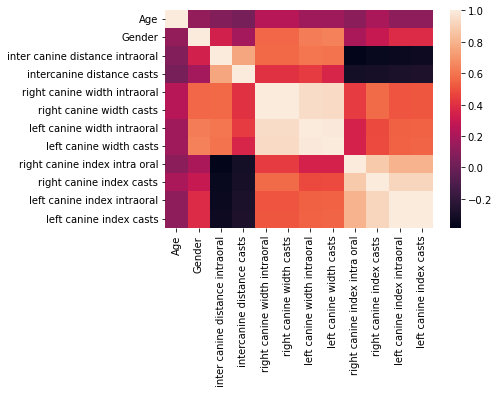

In [53]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
display(correlation)
# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [36]:
print(df["Gender"].corr(df["inter canine distance intraoral"]))
print(df["Gender"].corr(df["intercanine distance casts"]))

print()

print(df["Gender"].corr(df["right canine width intraoral"]))
print(df["Gender"].corr(df["right canine width casts"]))
print(df["Gender"].corr(df["left canine width intraoral"]))
print(df["Gender"].corr(df["left canine width casts"]))

print()

print(df["Gender"].corr(df["right canine index intra oral"]))
print(df["Gender"].corr(df["right canine index casts"]))
print(df["Gender"].corr(df["left canine index intraoral"]))
print(df["Gender"].corr(df["left canine index casts"]))

0.34049403836292913
0.18069240072412548

0.5579383923871407
0.5580567941483732
0.6263471819911379
0.6361988034212701

0.20354904821320882
0.295163086507601
0.3792488275722562
0.38213596105744296


## Data Wrangling ##

In [125]:
def wrangle(file_name):
    drop_cols = []
    
    # read csv
    df = pd.read_csv(file_name)
    
    # Remove high/low cardinality / redundant column
    drop_cols.extend(["Sl No", "Sample ID"])
    
    # Encode Target variable (Gender)
    le = LabelEncoder()
    le.fit(df["Gender"])
    df["Gender"] = le.transform(df["Gender"])
    
    # Drop multicollinearity column (intraoral vs casts)
    # drop_cols.append("intercanine distance casts") # ["inter canine distance intraoral", "intercanine distance casts"]
    drop_cols.append("right canine width intraoral") # ["right canine width intraoral", "right canine width casts"]
    drop_cols.append("left canine width intraoral") # ["left canine width intraoral", "left canine width casts"]
    
    drop_cols.append("right canine index intra oral") # ["right canine index intra oral", "right canine index casts"]
    drop_cols.append("left canine index intraoral") # ["left canine index intraoral", "left canine index casts"]
    
    # drop_cols.extend(["right canine width intraoral", "right canine width casts", "left canine width intraoral", "right canine index intra oral", "right canine index casts", "left canine index intraoral"]) # left "left canine width casts", "left canine index casts"
    
    # Drop columns
    df.drop(columns=drop_cols, inplace=True)
    return df

def wrangle2(file_name):
    drop_cols = []
    
    # read csv
    df = pd.read_csv(file_name)
    
    # Remove high/low cardinality / redundant column
    drop_cols.extend(["Sl No", "Sample ID"])
    
    # Encode Target variable (Gender)
    le = LabelEncoder()
    le.fit(df["Gender"])
    df["Gender"] = le.transform(df["Gender"])
    
    # Drop multicollinearity column (intraoral vs casts)
    drop_cols.append("intercanine distance casts") # ["inter canine distance intraoral", "intercanine distance casts"]
    drop_cols.extend(["right canine width intraoral", "right canine width casts", "left canine width intraoral", "right canine index intra oral", "right canine index casts", "left canine index intraoral"]) # left "left canine width casts", "left canine index casts"
    
    # Drop columns
    df.drop(columns=drop_cols, inplace=True)
    return df

def wrangle3(file_name):
    drop_cols = []
    
    # read csv
    df = pd.read_csv(file_name)
    
    # Remove high/low cardinality / redundant column
    drop_cols.extend(["Sl No", "Sample ID"])
    
    # Encode Target variable (Gender)
    le = LabelEncoder()
    le.fit(df["Gender"])
    df["Gender"] = le.transform(df["Gender"])
    
    # Modify Features
    df['width_casts'] = (df["right canine width casts"] + df["left canine width casts"]) / 2
    df['index_casts'] = (df["right canine index casts"] + df["left canine index casts"]) / 2
    
    # Drop multicollinearity column (intraoral vs casts)
    drop_cols.append("intercanine distance casts") # ["inter canine distance intraoral", "intercanine distance casts"]
    drop_cols.extend(["left canine index casts", "left canine width casts","right canine width intraoral", "right canine width casts", "left canine width intraoral", "right canine index intra oral", "right canine index casts", "left canine index intraoral"]) # left "left canine width casts", "left canine index casts"
    
    # Drop columns
    df.drop(columns=drop_cols, inplace=True)
    return df

In [126]:
df = wrangle("Dentistry Dataset.csv")
folder = "model"

In [127]:
display(df.head())
display(df.describe())

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width casts,left canine width casts,right canine index casts,left canine index casts
0,24,0,25.06,25.05,6.08,6.10,0.242,0.241
1,22,0,25.78,25.79,6.13,6.33,0.237,0.247
2,23,0,23.83,23.83,5.96,6.28,0.248,0.264
3,20,0,26.12,26.12,6.08,6.56,0.232,0.250
4,20,0,26.36,26.41,6.09,6.50,0.231,0.246


,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width casts,left canine width casts,right canine index casts,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,0.500000,25.989009,25.880082,6.564491,6.675018,0.252355,0.256361
std,2.085892,0.500227,1.315292,1.862323,0.377553,0.377098,0.012892,0.012374
min,18.000000,0.000000,23.120000,6.540000,5.460000,5.460000,0.223000,0.223000
25%,20.000000,0.000000,25.000000,24.980000,6.300000,6.407500,0.242000,0.247000
50%,22.000000,0.500000,25.900000,25.900000,6.520000,6.680000,0.253000,0.255000
75%,23.000000,1.000000,26.992500,27.000000,6.802500,6.920000,0.261250,0.264000
max,25.000000,1.000000,30.310000,30.310000,7.600000,7.810000,0.302000,0.304000


## Model Building ##

In [128]:
# train_test_split

y = df["Gender"]
X = df.drop(columns = "Gender")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (880, 7)
y_train shape: (880,)
X_test shape: (220, 7)
y_test shape: (220,)


### GridSearch ###

In [104]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [105]:
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_model = LogisticRegression(random_state=42)

lr_params = {
            'penalty': ['l2'],  
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [0.01, 0.1, 1]
}



lr_clf = GridSearchCV(lr_model, lr_params, cv = 5, scoring='roc_auc', verbose = 3).fit(X_train, y_train)

print(lr_clf.best_params_)
print(lr_clf.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.819 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.819 total time=   0.0s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.743 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, sol

In [106]:
# DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': list(range(10, 15))
}

dt_clf = GridSearchCV(dt_model, dt_params, cv = 5, scoring='roc_auc', verbose = 3).fit(X_train, y_train)

print(dt_clf.best_params_)
print(dt_clf.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.868 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.893 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.834 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.891 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.880 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=11;, score=0.839 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=11;, score=0.868 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=11;, score=0.831 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=11;, score=0.887 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=11;, score=0.870 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=12;, score=0.864 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=12;

In [107]:
# RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': list(range(10, 15))
}

rf_clf = GridSearchCV(rf_model, rf_params, cv = 5, scoring='roc_auc', verbose = 3).fit(X_train, y_train)

print(rf_clf.best_params_)
print(rf_clf.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.948 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.975 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.962 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.972 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.972 total time=   0.1s
[CV 1/5] END ......criterion=gini, max_depth=11;, score=0.953 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=11;, score=0.978 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=11;, score=0.964 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=11;, score=0.974 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=11;, score=0.970 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=12;, score=0.947 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=12;

In [108]:
#  GradientBoostingClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gb_model = GradientBoostingClassifier(random_state=42)

gb_params = {
            'criterion': ['exponential', 'deviance', 'log_loss'],
            'max_depth': list(range(3, 15)),
            'learning_rate': [0.01, 0.1],
            'criterion': ['friedman_mse', 'squared_error', 'mse'],
            'n_estimators': [100, 150,200]
}

gb_clf = GridSearchCV(gb_model, gb_params, cv = 5, scoring='roc_auc', verbose = 3).fit(X_train, y_train)

print(gb_clf.best_params_)
print(gb_clf.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.900 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.936 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.910 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.936 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.927 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.901 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.949 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=150;, score=0

### Actual Model and scoring ###

In [109]:
# https://stackoverflow.com/questions/41475539/using-best-params-from-gridsearchcv

import sklearn.metrics as metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle

In [110]:
# ROC 
# probs = lr_model.predict_proba(X_test)
def roc(probs, y_test, title):

    # calculate the fpr and tpr for all thresholds of the classification
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    print(f'Roc_Auc Score (using predict proba)')
    print(roc_auc_score(y_test, preds))
    
    # Plot ROC Curve
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def score_func(y_test, y_pred):
    print()
    
    print(f'Classification Report')
    print(classification_report(y_test, y_pred))
    
    print()
    
    print(f'Roc_Auc Score')
    print(roc_auc_score(y_test, y_pred))

#     https://medium.com/analytics-vidhya/save-and-load-your-scikit-learn-models-in-a-minute-21c91a961e9b
def save_model(model, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved at {file_name}")
def load_model(file_name):
    with open(file_name, 'rb') as f:
        model = pickle.load(f)
    return model

Model saved at model/lr_model.pkl
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy (Train): 0.7840909090909091
Accuracy (Test): 0.8181818181818182

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.81      0.81      0.81       107

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220


Roc_Auc Score
0.8180464808535274
Roc_Auc Score (using predict proba)
0.8896700024811843


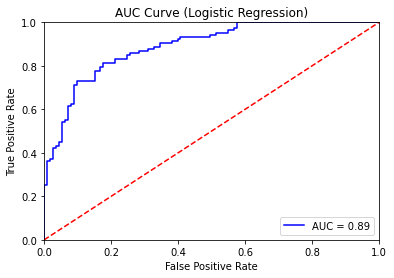

In [111]:
#  logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# lr_model.get_params()
# lr_model.coef_
# lr_model.intercept_

lr_model = LogisticRegression(random_state=42, **lr_clf.best_params_).fit(X_train, y_train)
save_model(lr_model, f'{folder}/lr_model.pkl')
print(lr_model.get_params())
print(f'Accuracy (Train): {lr_model.score(X_train, y_train)}')
print(f'Accuracy (Test): {lr_model.score(X_test, y_test)}')

score_func(y_test, lr_model.predict(X_test))

roc(lr_model.predict_proba(X_test), y_test, 'AUC Curve (Logistic Regression)')


Model saved at model/dt_model.pkl
Depth: 10
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Accuracy (Train): 0.9772727272727273
Accuracy (Test): 0.8545454545454545

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       113
           1       0.86      0.84      0.85       107

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220


Roc_Auc Score
0.8541890662476221
Roc_Auc Score (using predict proba)
0.8676288148209411


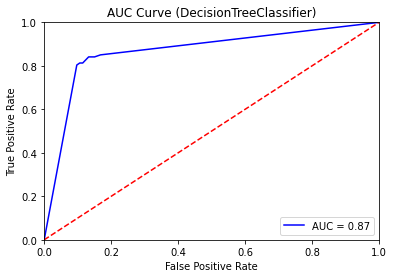

In [112]:
# DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://www.datacamp.com/tutorial/decision-tree-classification-python

dt_model = DecisionTreeClassifier(random_state=42, **dt_clf.best_params_).fit(X_train,y_train) 
save_model(dt_model, f'{folder}/dt_model.pkl')
print(f'Depth: {dt_model.get_depth()}')
print(dt_model.get_params())
print(f'Accuracy (Train): {dt_model.score(X_train, y_train)}')
print(f'Accuracy (Test): {dt_model.score(X_test, y_test)}')

score_func(y_test, dt_model.predict(X_test))

roc(dt_model.predict_proba(X_test), y_test, 'AUC Curve (DecisionTreeClassifier)')

Model saved at model/rf_model.pkl
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy (Train): 1.0
Accuracy (Test): 0.9

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       113
           1       0.88      0.92      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


Roc_Auc Score
0.9004218013398395
Roc_Auc Score (using predict proba)
0.9658837151600363


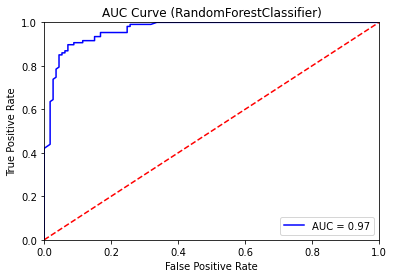

In [113]:
#  RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_model = RandomForestClassifier(random_state=42, **rf_clf.best_params_).fit(X_train,y_train)
save_model(rf_model, f'{folder}/rf_model.pkl')

print(rf_model.get_params())
print(f'Accuracy (Train): {rf_model.score(X_train, y_train)}')
print(f'Accuracy (Test): {rf_model.score(X_test, y_test)}')

score_func(y_test, rf_model.predict(X_test))

roc(rf_model.predict_proba(X_test), y_test, 'AUC Curve (RandomForestClassifier)')

Model saved at modelgb_model.pkl
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy (Train): 1.0
Accuracy (Test): 0.8954545454545455

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.87      0.93      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


Roc_Auc Score
0.8962451410139773
Roc_Auc Score (using predict proba)
0.9694814324704325


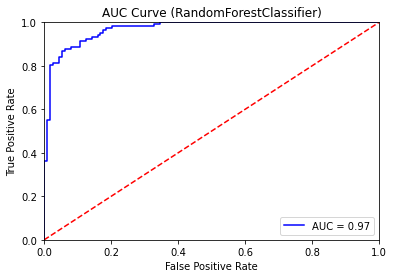

In [114]:
#  GradientBoostingClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gb_model = GradientBoostingClassifier(random_state=42, **gb_clf.best_params_).fit(X_train, y_train) 
save_model(gb_model, f'{folder}/gb_model.pkl')

print(gb_model.get_params())
print(f'Accuracy (Train): {gb_model.score(X_train, y_train)}')
print(f'Accuracy (Test): {gb_model.score(X_test, y_test)}')

score_func(y_test, gb_model.predict(X_test))

roc(gb_model.predict_proba(X_test), y_test, 'AUC Curve (RandomForestClassifier)')

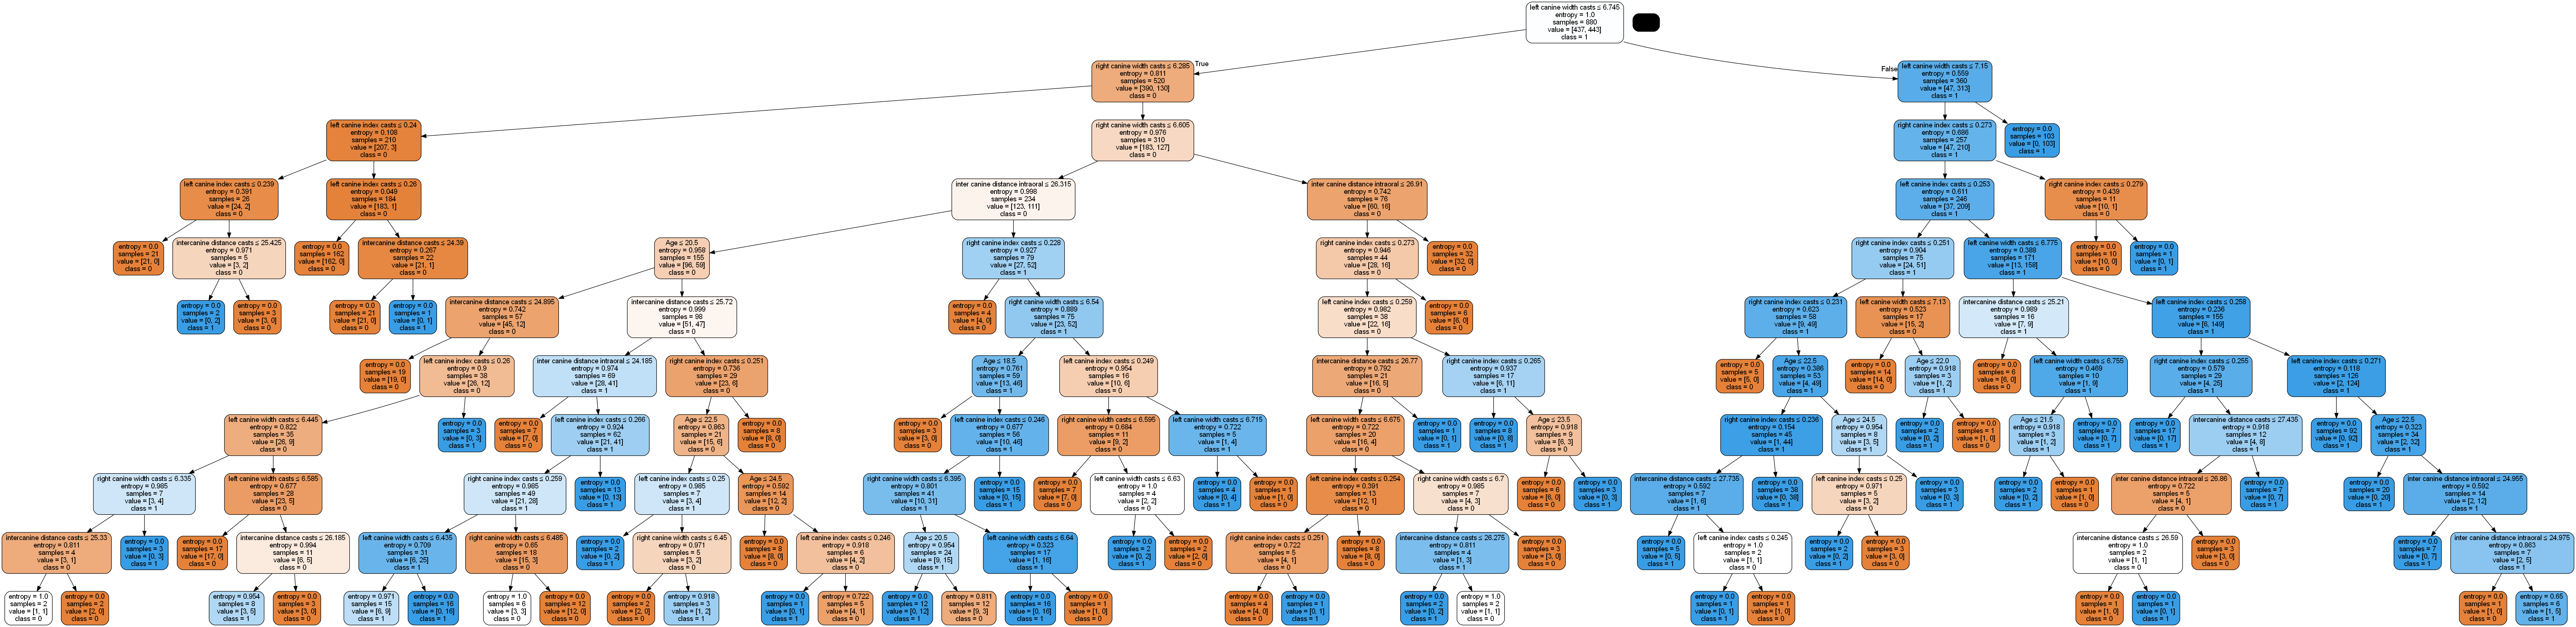

In [115]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = list(X.columns)
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(f'{folder}/dentistry.png')
Image(graph.create_png())

## Retrieve Model ##

In [132]:
file = "./model/rf_model.pkl"
model = load_model(file)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy (Train): 1.0
Accuracy (Test): 0.9

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       113
           1       0.88      0.92      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


Roc_Auc Score
0.9004218013398395
Roc_Auc Score (using predict proba)
0.9658837151600363


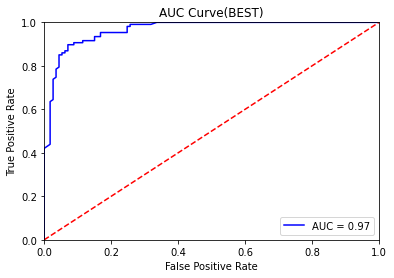

In [133]:
print(model.get_params())
print(f'Accuracy (Train): {model.score(X_train, y_train)}')
print(f'Accuracy (Test): {model.score(X_test, y_test)}')

score_func(y_test, model.predict(X_test))

roc(model.predict_proba(X_test), y_test, 'AUC Curve(BEST)')